Read sdss files

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class eBossModel:
    def __init__(self, file):
        self.file = file
        _s, _xi0, _xi2, _xi4 = np.loadtxt(self.file, unpack=True)
        self.r = _s
        self.poles = {0: _xi0, 2: _xi2, 4: _xi4}
    
    def get_npoles(self, pole):
        return self.poles[pole]
    
    def plot(self, pole, ax, plot_args=dict()):
        ax.plot(self.r, self.poles[pole]*self.r**2, **plot_args)
    
class eBossData:
    def __init__(self, file):
        self.file = file
        _s, _xi0, _xi0_err, _xi2, _xi2_err, _xi4, _xi4_err = np.loadtxt(self.file, unpack=True)
        self.r = _s
        self.poles = {0: _xi0, 2: _xi2, 4:_xi4}
        self.poles_err = {0: _xi0_err, 2: _xi2_err, 4:_xi4_err}        

    def get_xi(self, pole):
        return self.poles[pole], self.poles_err[pole]
    
    def plot(self, pole, ax, plot_args=dict()):
        ax.errorbar(self.r, self.r**2*self.poles[pole], self.r**2*self.poles_err[pole], **plot_args)
    
model = eBossModel('Model_QSOxi_NGCSGC_0.8z2.2_prerecon.txt')
data = eBossData('Data_QSOxi_NGCSGC_0.8z2.2_prerecon.txt')

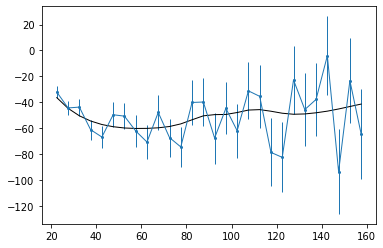

In [4]:
fig, ax = plt.subplots()
pole=2

data.plot(pole, ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1))
model.plot(pole, ax, plot_args=dict(lw=1, c='k'))